In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import imageio
from tensorflow_docs.vis import embed

In [2]:
# Specifying paths within dataset

orig_path = 'DeepFake Data/Original/'
manip_path = 'DeepFake Data/Manipulated/'
all_videos_path = 'DeepFake Data/All/'

orig_downsampled_path = 'DeepFake Data/orig_downsampled/'
manip_downsampled_path = 'DeepFake Data/manip_downsampled/'

orig_still_path = 'DeepFake Data/orig_singleframe/'
manip_still_path = 'DeepFake Data/manip_singleframe/'

In [3]:
# Function for creating metadata dictionary with which to convert into a table later

def get_metadata_dict():
    metadata_dict = {'File name': [],
                    'File path': [],
                    'Label': [],
                    'Original video': []}
    
    return metadata_dict
            

## Creating image data from original dataset

In [4]:
# Extract individual frames from original videos

# for dirname, _, filenames in os.walk(orig_path):
#     for filename in filenames:
#         single_frame_from_video_file(orig_path + filename, 150, filename, orig_still_path)

In [5]:
# Extract individidual frames from the first 363 manipulated videos (for class balance)

# i = 0

# for dirname, _, filenames in os.walk(manip_path):
#     for filename in filenames:
#         if i < 363:
#             single_frame_from_video_file(manip_path + filename, 10, filename, manip_still_path)
#             i += 1
#         else:
#             break

## Downsampling data

In [6]:
def downsample_video_data(path, filename, new_path):
    # Returns a version of the video that is scaled per the dimensions specified

    cap = cv2.VideoCapture(path)

    print("Input:", path)

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Where desired scaling is specified
    out_width = int(width * 0.2)
    out_height = int(height * 0.2)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    output_path = new_path + filename[:-4] + '_downsampled.mp4'
    print(output_path)
    out = cv2.VideoWriter(output_path, fourcc, fps, (out_width, out_height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        downsampled = cv2.resize(frame, (out_width, out_height), interpolation=cv2.INTER_AREA)
        out.write(downsampled)

    cap.release()
    out.release()


In [7]:
# To downsample original videos

# import os
# for dirname, _, filenames in os.walk(orig_path):
#     for filename in filenames:
#         downsample_video_data(orig_path + filename, filename, orig_downsampled_path)

# Data preprocessing (video data)

In [8]:
def add_video_to_class(path):
    files = []
    files_with_path = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            if filename.endswith('.mp4'):
                files.append(filename)
                files_with_path.append(path + filename)

    return files, files_with_path

In [9]:
original = add_video_to_class(orig_downsampled_path)[0]
manipulated = add_video_to_class(manip_downsampled_path)[0]

In [10]:
original_with_path = add_video_to_class(orig_downsampled_path)[1]
manipulated_with_path = add_video_to_class(orig_downsampled_path)[1]

In [11]:
print("Number of observations (original videos):", len(original))
print("Number of observations (manipulated videos):", len(manipulated))

Number of observations (original videos): 363
Number of observations (manipulated videos): 353


In [12]:
manipulated

['01_02__walking_down_indoor_hall_disgust__YVGY8LOK_downsampled.mp4',
 '05_16__hugging_happy__053HPS1G_downsampled.mp4',
 '01_15__podium_speech_happy__02HILKYO_downsampled.mp4',
 '02_18__walk_down_hall_angry__B95S4G6F_downsampled.mp4',
 '23_22__walking_and_outside_surprised__J671JKCH_downsampled.mp4',
 '02_01__talking_against_wall__YVGY8LOK_downsampled.mp4',
 '02_06__walking_down_street_outside_angry__MKZTXQ2T_downsampled.mp4',
 '01_14__outside_talking_still_laughing__01YF7VQM_downsampled.mp4',
 '02_06__exit_phone_room__3J3BHSHI_downsampled.mp4',
 '02_03__walking_down_street_outside_angry__QH3Y0IG0_downsampled.mp4',
 '23_19__secret_conversation__H4SUVFTL_downsampled.mp4',
 '02_09__podium_speech_happy__9TDCEK1Q_downsampled.mp4',
 '10_22__podium_speech_happy__EHARPYBT_downsampled.mp4',
 '10_22__kitchen_pan__EHARPYBT_downsampled.mp4',
 '02_15__talking_against_wall__HTG660F8_downsampled.mp4',
 '19_23__secret_conversation__D1K19NUP_downsampled.mp4',
 '01_09__kitchen_pan__6TSGVLHA_downsample

In [13]:
all_videos = original + manipulated

In [14]:
len(original)

363

### Gathering metadata

In [15]:
# Original videos

def add_originals(metadata_dict):
    for file_name in original:
        metadata_dict['File name'].append(file_name)
        # metadata_dict['File path'].append(orig_path + file_name)
        metadata_dict['File path'].append(orig_downsampled_path + file_name)
        metadata_dict['Label'].append("original")
        metadata_dict['Original video'].append(None)

In [16]:
# Manipulated videos

def add_manipulated(metadata_dict, manip_video_list = manipulated):
    for manip_file_name in manip_video_list:
        metadata_dict['File name'].append(manip_file_name)
        # metadata_dict['File path'].append(manip_path + manip_file_name)
        metadata_dict['File path'].append(manip_downsampled_path + manip_file_name)
        metadata_dict['Label'].append("manipulated")
        for orig_file_name in original:
            # Check for name of respective original video (conditions based on assumed general naming conventions of file)
            #if (orig_file_name[4:][:-4] in manip_file_name) and (orig_file_name[:2] == manip_file_name[:2]):
            if (orig_file_name[4:][:-16] in manip_file_name) and (orig_file_name[:2] == manip_file_name[:2]):
                print(orig_file_name, '-', manip_file_name)
                metadata_dict['Original video'].append(orig_file_name)

In [17]:
full_metadata_dict = get_metadata_dict()

add_originals(full_metadata_dict)
add_manipulated(full_metadata_dict)

01__walking_down_indoor_hall_disgust_downsampled.mp4 - 01_02__walking_down_indoor_hall_disgust__YVGY8LOK_downsampled.mp4
05__hugging_happy_downsampled.mp4 - 05_16__hugging_happy__053HPS1G_downsampled.mp4
01__podium_speech_happy_downsampled.mp4 - 01_15__podium_speech_happy__02HILKYO_downsampled.mp4
02__walk_down_hall_angry_downsampled.mp4 - 02_18__walk_down_hall_angry__B95S4G6F_downsampled.mp4
23__walking_and_outside_surprised_downsampled.mp4 - 23_22__walking_and_outside_surprised__J671JKCH_downsampled.mp4
02__talking_against_wall_downsampled.mp4 - 02_01__talking_against_wall__YVGY8LOK_downsampled.mp4
02__walking_down_street_outside_angry_downsampled.mp4 - 02_06__walking_down_street_outside_angry__MKZTXQ2T_downsampled.mp4
01__outside_talking_still_laughing_downsampled.mp4 - 01_14__outside_talking_still_laughing__01YF7VQM_downsampled.mp4
02__exit_phone_room_downsampled.mp4 - 02_06__exit_phone_room__3J3BHSHI_downsampled.mp4
02__walking_down_street_outside_angry_downsampled.mp4 - 02_03__wa

In [18]:
# Sanity check

assert(len(full_metadata_dict['Original video']) == len(all_videos))

In [19]:
full_metadata_df = pd.DataFrame(full_metadata_dict)
full_metadata_df

File name  \
0                    12__kitchen_still_downsampled.mp4   
1    01__walking_and_outside_surprised_downsampled.mp4   
2              22__podium_speech_happy_downsampled.mp4   
3                      22__kitchen_pan_downsampled.mp4   
4             09__talking_against_wall_downsampled.mp4   
..                                                 ...   
711     02_07__hugging_happy__1JCLEEBQ_downsampled.mp4   
712   05_16__exit_phone_room__B62WCGUN_downsampled.mp4   
713  01_09__walk_down_hall_angry__P70H1JB0_downsamp...   
714  03_12__walk_down_hall_angry__D7G6YJON_downsamp...   
715     08_17__kitchen_still__JZYRLJ8T_downsampled.mp4   

                                             File path        Label  \
0    DeepFake Data/orig_downsampled/12__kitchen_sti...     original   
1    DeepFake Data/orig_downsampled/01__walking_and...     original   
2    DeepFake Data/orig_downsampled/22__podium_spee...     original   
3    DeepFake Data/orig_downsampled/22__kitchen_pan...     original   
4    DeepFake Data/orig_downsampled/09__talking_aga...     original   
..                                                 ...          ...   
711  DeepFake Data/manip_downsampled/02_07__hugging...  manipulated   
712  DeepFake Data/manip_downsampled/05_16__exit_ph...  manipulated   
713  DeepFake Data/manip_downsampled/01_09__walk_do...  manipulated   
714  DeepFake Data/manip_downsampled/03_12__walk_do...  manipulated   
715  DeepFake Data/manip_downsampled/08_17__kitchen...  manipulated   

                               Original video  
0                                        None  
1                                        None  
2                                        None  
3                                        None  
4                                        None  
..                                        ...  
711         02__hugging_happy_downsampled.mp4  
712       05__exit_phone_room_downsampled.mp4  
713  01__walk_down_hall_angry_downsampled.mp4  
714  03__walk_down_hall_angry_downsampled.mp4  
715         08__kitchen_still_downsampled.mp4  

[716 rows x 4 columns]

In [20]:
full_metadata_df.sample(frac=1)

File name  \
630     02_01__hugging_happy__YVGY8LOK_downsampled.mp4   
15                 11__exit_phone_room_downsampled.mp4   
152                25__exit_phone_room_downsampled.mp4   
215  27__outside_talking_still_laughing_downsampled...   
94                     10__kitchen_pan_downsampled.mp4   
..                                                 ...   
180           15__talking_against_wall_downsampled.mp4   
538     10_24__kitchen_still__356HPS7R_downsampled.mp4   
605     03_01__kitchen_still__JZUXXFRB_downsampled.mp4   
618  22_19__outside_talking_pan_laughing__VK6BF5NV_...   
444  02_01__walking_and_outside_surprised__YVGY8LOK...   

                                             File path        Label  \
630  DeepFake Data/manip_downsampled/02_01__hugging...  manipulated   
15   DeepFake Data/orig_downsampled/11__exit_phone_...     original   
152  DeepFake Data/orig_downsampled/25__exit_phone_...     original   
215  DeepFake Data/orig_downsampled/27__outside_tal...     original   
94   DeepFake Data/orig_downsampled/10__kitchen_pan...     original   
..                                                 ...          ...   
180  DeepFake Data/orig_downsampled/15__talking_aga...     original   
538  DeepFake Data/manip_downsampled/10_24__kitchen...  manipulated   
605  DeepFake Data/manip_downsampled/03_01__kitchen...  manipulated   
618  DeepFake Data/manip_downsampled/22_19__outside...  manipulated   
444  DeepFake Data/manip_downsampled/02_01__walking...  manipulated   

                                        Original video  
630                  02__hugging_happy_downsampled.mp4  
15                                                None  
152                                               None  
215                                               None  
94                                                None  
..                                                 ...  
180                                               None  
538                  10__kitchen_still_downsampled.mp4  
605                  03__kitchen_still_downsampled.mp4  
618   22__outside_talking_pan_laughing_downsampled.mp4  
444  02__walking_and_outside_surprised_downsampled.mp4  

[716 rows x 4 columns]

# Data preprocessing (image data)

### Extract frames and save as images

In [21]:
def single_frame_from_video_file(video_path, frame_number, filename, output_path):
    # For extracting still frames from videos

    cap = cv2.VideoCapture(video_path)
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    output_path += filename
    output_path = output_path[:-4] + ".jpg"
    print(output_path)

    cv2.imwrite(output_path, frame)

    cap.release()
    cv2.destroyAllWindows()

In [22]:
# For extracting still frames from manipulated videos
# for dirname, _, filenames in os.walk(manip_downsampled_path):
#     for filename in filenames:
#         single_frame_from_video_file(manip_downsampled_path + filename, 20, filename, manip_still_path)

### Create list of file names

In [23]:
def add_still_to_class(path):
    files = []
    files_path = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            if filename.endswith('.jpg'):
                files.append(filename)
                files_path.append(path + filename)

    return files, files_path

In [24]:
original_still = add_still_to_class(orig_still_path)[0]
manip_still = add_still_to_class(manip_still_path)[0]

In [25]:
manip_still

['02_04__outside_talking_pan_laughing__8CH7R4LW.jpg',
 '01_20__outside_talking_still_laughing__6UBMLXK3.jpg',
 '02_01__meeting_serious__YVGY8LOK.jpg',
 '02_07__talking_against_wall__O4SXNLRL.jpg',
 '01_14__walking_outside_cafe_disgusted__01YF7VQM.jpg',
 '02_13__walking_and_outside_surprised__CP5HFV3K.jpg',
 '02_25__exit_phone_room__Z7FQ69VP.jpg',
 '01_27__hugging_happy__ZYCZ30C0.jpg',
 '02_06__talking_angry_couch__MKZTXQ2T.jpg',
 '02_12__outside_talking_pan_laughing__9D2ZHEKW.jpg',
 '02_15__meeting_serious__MZWH8ATN.jpg',
 '02_09__outside_talking_pan_laughing__HIH8YA82.jpg',
 '01_20__talking_angry_couch__FW94AIMJ.jpg',
 '02_27__outside_talking_pan_laughing__QW05XUUZ.jpg',
 '01_15__kitchen_still__02HILKYO.jpg',
 '01_03__meeting_serious__JZUXXFRB.jpg',
 '01_11__secret_conversation__4OJNJLOO.jpg',
 '02_07__exit_phone_room__9NVRE2KQ.jpg',
 '01_15__walk_down_hall_angry__02HILKYO.jpg',
 '01_11__walking_outside_cafe_disgusted__FAFWDR4W.jpg',
 '02_25__hugging_happy__Z7FQ69VP.jpg',
 '02_09__sec

### Gathering metadata

In [26]:
# Single frame from original videos

def add_originals_still(metadata_dict):
    for file_name in original_still:
        metadata_dict['File name'].append(file_name)
        # metadata_dict['File path'].append(orig_path + file_name)
        metadata_dict['File path'].append(orig_still_path + file_name)
        metadata_dict['Label'].append("original")
        metadata_dict['Original video'].append(None)

In [27]:
# Single frame from manipulated videos

def add_manipulated_still(metadata_dict, manip_video_list = manipulated):
    for manip_file_name in manip_still:
        metadata_dict['File name'].append(manip_file_name)
        # metadata_dict['File path'].append(manip_path + manip_file_name)
        metadata_dict['File path'].append(manip_still_path + manip_file_name)
        metadata_dict['Label'].append("manipulated")
        for orig_file_name in original_still:
            # Check for name of respective original video (conditions based on assumed general naming conventions of file)
            if (orig_file_name[4:][:-4] in manip_file_name) and (orig_file_name[:2] == manip_file_name[:2]):
            #if (orig_file_name[4:][:-16] in manip_file_name) and (orig_file_name[:2] == manip_file_name[:2]):
                print(orig_file_name, '-', manip_file_name)
                metadata_dict['Original video'].append(orig_file_name)

In [28]:
len(manip_still) + len(original_still)

726

In [29]:
full_still_metadata_dict = get_metadata_dict()

add_originals_still(full_still_metadata_dict)
add_manipulated_still(full_still_metadata_dict)
len(full_still_metadata_dict['Original video'])

02__outside_talking_pan_laughing.jpg - 02_04__outside_talking_pan_laughing__8CH7R4LW.jpg
01__outside_talking_still_laughing.jpg - 01_20__outside_talking_still_laughing__6UBMLXK3.jpg
02__meeting_serious.jpg - 02_01__meeting_serious__YVGY8LOK.jpg
02__talking_against_wall.jpg - 02_07__talking_against_wall__O4SXNLRL.jpg
01__walking_outside_cafe_disgusted.jpg - 01_14__walking_outside_cafe_disgusted__01YF7VQM.jpg
02__walking_and_outside_surprised.jpg - 02_13__walking_and_outside_surprised__CP5HFV3K.jpg
02__exit_phone_room.jpg - 02_25__exit_phone_room__Z7FQ69VP.jpg
01__hugging_happy.jpg - 01_27__hugging_happy__ZYCZ30C0.jpg
02__talking_angry_couch.jpg - 02_06__talking_angry_couch__MKZTXQ2T.jpg
02__outside_talking_pan_laughing.jpg - 02_12__outside_talking_pan_laughing__9D2ZHEKW.jpg
02__meeting_serious.jpg - 02_15__meeting_serious__MZWH8ATN.jpg
02__outside_talking_pan_laughing.jpg - 02_09__outside_talking_pan_laughing__HIH8YA82.jpg
01__talking_angry_couch.jpg - 01_20__talking_angry_couch__FW94AI

726

In [30]:
# Sanity check

assert(len(full_still_metadata_dict['Original video']) == (len(manip_still) + len(original_still)))

In [31]:
full_still_metadata_df = pd.DataFrame(full_still_metadata_dict)
full_still_metadata_df

File name  \
0                         23__walk_down_hall_angry.jpg   
1                         22__talking_against_wall.jpg   
2                          23__talking_angry_couch.jpg   
3                          14__talking_angry_couch.jpg   
4                                26__kitchen_still.jpg   
..                                                 ...   
721  02_09__walking_down_street_outside_angry__6KUO...   
722           02_01__secret_conversation__YVGY8LOK.jpg   
723                   02_15__kitchen_pan__SB6PMCO0.jpg   
724                 02_07__hugging_happy__1JCLEEBQ.jpg   
725                 01_15__hugging_happy__02HILKYO.jpg   

                                             File path        Label  \
0    DeepFake Data/orig_singleframe/23__walk_down_h...     original   
1    DeepFake Data/orig_singleframe/22__talking_aga...     original   
2    DeepFake Data/orig_singleframe/23__talking_ang...     original   
3    DeepFake Data/orig_singleframe/14__talking_ang...     original   
4    DeepFake Data/orig_singleframe/26__kitchen_sti...     original   
..                                                 ...          ...   
721  DeepFake Data/manip_singleframe/02_09__walking...  manipulated   
722  DeepFake Data/manip_singleframe/02_01__secret_...  manipulated   
723  DeepFake Data/manip_singleframe/02_15__kitchen...  manipulated   
724  DeepFake Data/manip_singleframe/02_07__hugging...  manipulated   
725  DeepFake Data/manip_singleframe/01_15__hugging...  manipulated   

                                Original video  
0                                         None  
1                                         None  
2                                         None  
3                                         None  
4                                         None  
..                                         ...  
721  02__walking_down_street_outside_angry.jpg  
722                02__secret_conversation.jpg  
723                        02__kitchen_pan.jpg  
724                      02__hugging_happy.jpg  
725                      01__hugging_happy.jpg  

[726 rows x 4 columns]

In [32]:
full_still_metadata_df.sample(frac=1)

File name  \
340              12__walking_and_outside_surprised.jpg   
547          02_01__walk_down_hall_angry__YVGY8LOK.jpg   
512           01_03__podium_speech_happy__480LQD1C.jpg   
293                              19__kitchen_still.jpg   
408          02_15__walk_down_hall_angry__TN2CWM3K.jpg   
..                                                 ...   
484           01_20__talking_angry_couch__6UBMLXK3.jpg   
367  01_14__walking_outside_cafe_disgusted__01YF7VQ...   
91                        25__talking_against_wall.jpg   
124                              03__kitchen_still.jpg   
259             24__outside_talking_still_laughing.jpg   

                                             File path        Label  \
340  DeepFake Data/orig_singleframe/12__walking_and...     original   
547  DeepFake Data/manip_singleframe/02_01__walk_do...  manipulated   
512  DeepFake Data/manip_singleframe/01_03__podium_...  manipulated   
293  DeepFake Data/orig_singleframe/19__kitchen_sti...     original   
408  DeepFake Data/manip_singleframe/02_15__walk_do...  manipulated   
..                                                 ...          ...   
484  DeepFake Data/manip_singleframe/01_20__talking...  manipulated   
367  DeepFake Data/manip_singleframe/01_14__walking...  manipulated   
91   DeepFake Data/orig_singleframe/25__talking_aga...     original   
124  DeepFake Data/orig_singleframe/03__kitchen_sti...     original   
259  DeepFake Data/orig_singleframe/24__outside_tal...     original   

                             Original video  
340                                    None  
547            02__walk_down_hall_angry.jpg  
512             01__podium_speech_happy.jpg  
293                                    None  
408            02__walk_down_hall_angry.jpg  
..                                      ...  
484             01__talking_angry_couch.jpg  
367  01__walking_outside_cafe_disgusted.jpg  
91                                     None  
124                                    None  
259                                    None  

[726 rows x 4 columns]

# Truncating the data for a more feasible dataset to work with (permanently commented out since dataset is already reduced)

In [33]:
# orig_video_name = []
# for orig_file_name in original:
#     orig_video_name.append(orig_file_name[:][:-4])

# orig_video_name

In [34]:
# manipulated_truncated = []

# for name in orig_video_name:
#     manip_counter = 0
#     for manipulated_video in manipulated:
#         if (name in manipulated_video) and (manip_counter < 1):
#             manipulated_truncated.append(manipulated_video)
#             manip_counter += 1

# manipulated_truncated

In [35]:
# for video in manipulated_truncated:
#     if os.path.exists(manip_path + video):
#         downsample_video_data(manip_path + video, video, manip_downsampled_path)

In [36]:
# trunc_metadata_dict = get_metadata_dict()

# add_originals(trunc_metadata_dict)
# add_manipulated(trunc_metadata_dict, manip_video_list=manipulated_truncated)

In [37]:
# trunc_metadata_df = pd.DataFrame(trunc_metadata_dict)
# trunc_metadata_df

## Splitting data for train/test

In [38]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(full_metadata_df, test_size = 0.2, random_state = 1)

In [39]:
sum(train['Label'] == 'original')

288

In [40]:
train_files = list(train['File name'])
test_files = list(test['File name'])

train_files_path = list(train['File path'])
test_files_path = list(test['File path'])

train_classes = list(train['Label'])
test_classes = list(test['Label'])

In [41]:
assert(len(train_files_path) == len(train_files))
assert(len(test_files_path) == len(test_files))

In [42]:
def format_frames(frame, output_size):
    frame = tf.image.convert_image_dtype(frame, tf.float32)
    frame = tf.image.resize_with_pad(frame, *output_size)
    return frame

# Visualization (video data)

In [43]:
def frames_from_video_file(video_path, n_frames, output_size = (90, 160), frame_step = 15):
    # Returns specified number of frames for each video path passed as a parameter, with the specified output size, for every number of frames (also specified)
    # This function is originally from Tensorflow, only retyped for exercising purposes.
    
    # Read each video frame by frame
    result = []
    src = cv2.VideoCapture(str(video_path))

    video_length = src.get(cv2.CAP_PROP_FRAME_COUNT)

    need_length = 1 + (n_frames - 1) * frame_step

    if need_length > video_length:
        start = 0

    else:
        max_start = video_length - need_length
        start = random.randint(0, max_start + 1)

    src.set(cv2.CAP_PROP_POS_FRAMES, start)
    ret, frame = src.read()
    result.append(format_frames(frame, output_size))

    for _ in range(n_frames - 1):
        for _ in range(frame_step):
            ret_frame = src.read()

        if ret:
            frame = format_frames(frame, output_size)
            result.append(frame)

        else:
            result.append(np.zeros_like(result[0]))

    src.release()
    result = np.array(result)[..., [2, 1, 0]]

    return result

In [44]:
gifs_generated = 0

def to_gif(images):
    # Takes vectorized array of frames, converts it to a GIF, and saves it as a file to same directory as notebook, before displaying
    # Note: Function is originally from TensorFlow, with alterations to accommodate for save GIF file name preferences.

    converted_images = np.clip(images * 255, 0, 255).astype(np.uint8)
    global gifs_generated
    gifs_generated += 1
    path = str('./sample_' + str(gifs_generated) + '.gif') 
    imageio.mimsave(path, converted_images, fps = 5)

    return embed.embed_file(path)


### Original videos

DeepFake Data/orig_downsampled/26__exit_phone_room_downsampled.mp4
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

[[[[0.7568628  0.7686275  0.8196079 ]
   [0.7568628  0.7686275  0.8196079 ]
   [0.7568628  0.7686275  0.8196079 ]
   ...
   [0.72352964 0.7441178  0.7637257 ]
   [0.7254902  0.74509805 0.76470596]
   [0.7254902  0.74509805 0.76470596]]

  [[0.7568628  0.7686275  0.8196079 ]
   [0.7568628  0.7686275  0.8196079 ]
   [0.7568628  0.7686275  0.8196079 ]
   ...
   [0.72352964 0.7441178  0.7637257 ]
   [0.7254902  0.74509805 0.76470596]
   [0.7254902  0.74509805 0.76470596]]

  [[0.7568628  0.7686275  0.8196079 ]
   [0.7568628  0.7686275  0.8196079 ]
   [0.7568628  0.7686275  0.8196079 ]
   ...
   [0.7235297  0.74411786 0.7637257 ]
   [0.7254903  0.74509805 0.764706  ]
   [0.7254903  0.74509805 0.764706  ]]

  ...

  [[0.7107843  0.73039216 0.7578432 ]
   [0.7107843  0.73039216 0.7578432 ]
   [0.7107843  0.73039216 0.7578432 ]
   ...
   [0.6647059


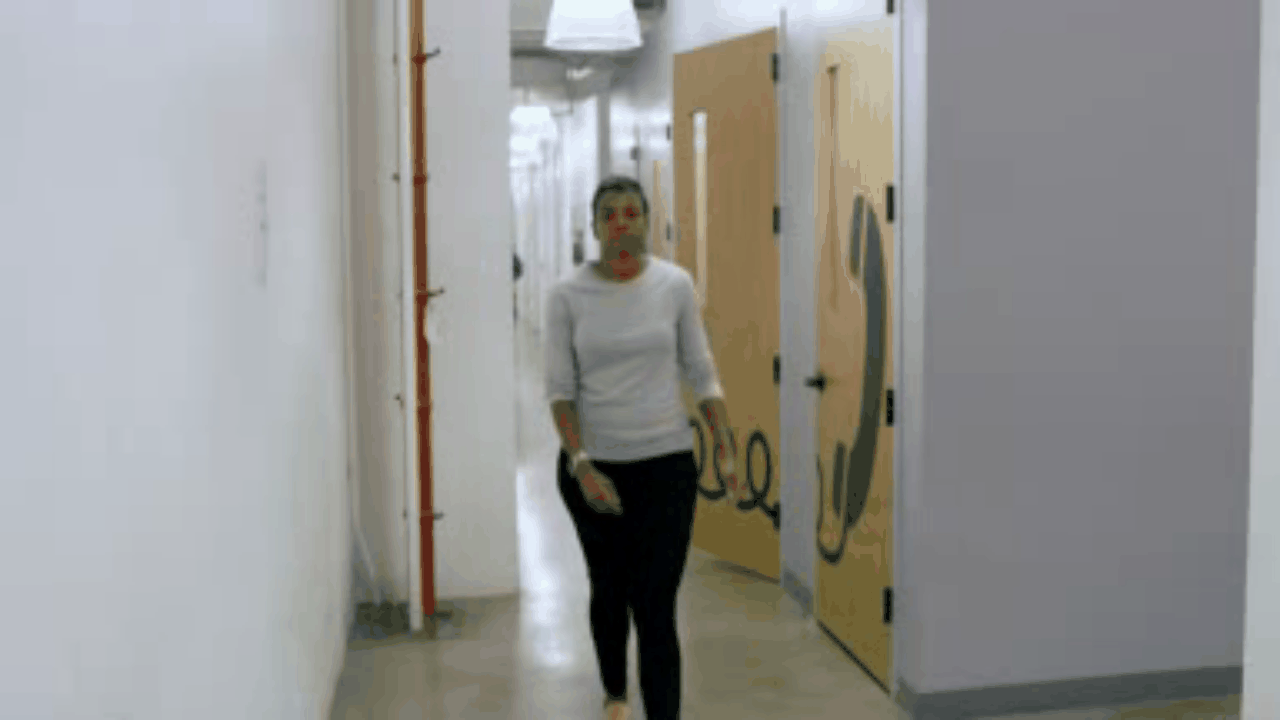

In [45]:
import random
import tensorflow as tf


random_orig_video = original_with_path[random.randint(0, len(original))]

print(random_orig_video)

random_orig_videos_frames = frames_from_video_file(random_orig_video, output_size = (720, 1280), n_frames = 10)

print(random_orig_videos_frames)

to_gif(random_orig_videos_frames)

### Altered videos

DeepFake Data/orig_downsampled/01__kitchen_still_downsampled.mp4
[[[[0.07058824 0.0509804  0.01568628]
   [0.07058824 0.0509804  0.01568628]
   [0.07745099 0.05784314 0.02254902]
   ...
   [0.5882358  0.5735298  0.55000037]
   [0.5921569  0.5764706  0.5529412 ]
   [0.5921569  0.5764706  0.5529412 ]]

  [[0.07058824 0.0509804  0.01568628]
   [0.07058824 0.0509804  0.01568628]
   [0.07745099 0.05784314 0.02254902]
   ...
   [0.5882358  0.5735298  0.55000037]
   [0.5921569  0.5764706  0.5529412 ]
   [0.5921569  0.5764706  0.5529412 ]]

  [[0.07058825 0.0509804  0.01568628]
   [0.07058825 0.0509804  0.01568628]
   [0.07745099 0.05784314 0.02254902]
   ...
   [0.5882358  0.57352984 0.55000037]
   [0.5921569  0.5764706  0.5529412 ]
   [0.5921569  0.5764706  0.5529412 ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.7843138  0.8117648  0.8196079 ]
   [0.7843138  0.8117648  0.8196079 ]
   [0.7843138  0.811


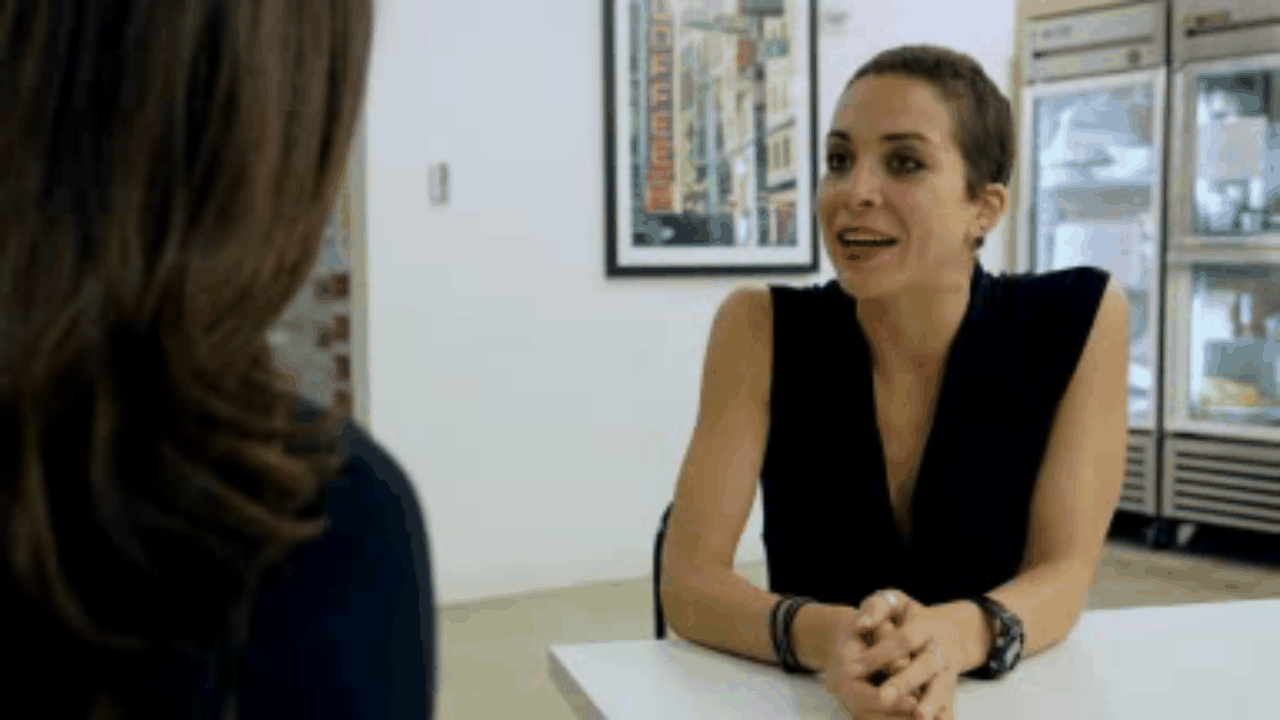

In [46]:
random_manip_video = manipulated_with_path[random.randint(0, len(manipulated))]

print(random_manip_video)

random_manip_videos_frames = frames_from_video_file(random_manip_video, output_size = (720, 1280), n_frames = 10)

print(random_manip_videos_frames)

to_gif(random_manip_videos_frames)

In [47]:
# Checking frame representations (video data)

video_frames = frames_from_video_file(train_files_path[0], 10) 
video_frames

array([[[[0.6451373 , 0.59023535, 0.37454903],
         [0.6756471 , 0.6207451 , 0.40517652],
         [0.6872549 , 0.63235295, 0.4166667 ],
         ...,
         [0.6937256 , 0.6454903 , 0.40235305],
         [0.7026275 , 0.6516471 , 0.40968636],
         [0.7058824 , 0.654902  , 0.41176474]],

        [[0.6361961 , 0.5853334 , 0.35631374],
         [0.64870596, 0.59811765, 0.3687451 ],
         [0.6217647 , 0.5707844 , 0.34176472],
         ...,
         [0.69529396, 0.64607835, 0.40313724],
         [0.69925517, 0.6489805 , 0.4058825 ],
         [0.7101961 , 0.6592157 , 0.42000002]],

        [[0.5996078 , 0.54862744, 0.31274512],
         [0.6494118 , 0.59843135, 0.3611765 ],
         [0.64607847, 0.59607846, 0.35882354],
         ...,
         [0.70882374, 0.6578433 , 0.416667  ],
         [0.7213726 , 0.6703922 , 0.42921576],
         [0.71705884, 0.6694117 , 0.42686275]],

        ...,

        [[0.13725491, 0.13725491, 0.10196079],
         [0.13725491, 0.13725491, 0.10196079]

# Modeling (video data)

In [48]:
class FrameGenerator:
    # Returns frames per video and respective label (original/fake), with every iteration (every time this is called).
    # Note: Function is originally from TensorFlow, with appropriate alterations to accommodate for my dataset.

    def __init__(self, path_list, class_list, n_frames, training = False):
        self.path_list = path_list
        self.class_list = class_list
        self.n_frames = n_frames
        self.training = training
        self.class_names = set(('original', 'manipulated'))
        self.class_ids_for_name = dict((name, idx) for idx, name in enumerate(self.class_names))

    def get_files_and_class_names(self):
        video_paths = self.path_list
        classes = self.class_list
        return video_paths, classes
    
    def __call__(self):
        video_paths, classes = self.get_files_and_class_names()

        pairs = list(zip(video_paths, classes))

        if self.training:
            random.shuffle(pairs)

        for path, name in pairs:
            video_frames = frames_from_video_file(path, self.n_frames)
            label = self.class_ids_for_name[name]

            yield video_frames, label

Shape: [[[[0.2347451  0.24341178 0.25827453]
   [0.24776472 0.25560787 0.26882353]
   [0.25980395 0.2682353  0.28333336]
   ...
   [0.0509804  0.0509804  0.0627451 ]
   [0.0509804  0.0509804  0.0627451 ]
   [0.0509804  0.0509804  0.0627451 ]]

  [[0.38094124 0.3887844  0.40435302]
   [0.36168635 0.36952946 0.3848628 ]
   [0.32372555 0.33333343 0.347255  ]
   ...
   [0.0509804  0.0509804  0.0627451 ]
   [0.0509804  0.0509804  0.0627451 ]
   [0.0509804  0.0509804  0.0627451 ]]

  [[0.33862743 0.34843135 0.36215684]
   [0.34137252 0.34921566 0.36470586]
   [0.35392153 0.36274505 0.37647057]
   ...
   [0.0509804  0.0509804  0.0627451 ]
   [0.0509804  0.0509804  0.0627451 ]
   [0.0509804  0.0509804  0.0627451 ]]

  ...

  [[0.6507844  0.6958824  0.70568633]
   [0.66078436 0.7076471  0.7156863 ]
   [0.6450981  0.6921569  0.70000005]
   ...
   [0.2647059  0.3019608  0.27254903]
   [0.2647059  0.3019608  0.27254903]
   [0.2647059  0.3019608  0.27254903]]

  [[0.4798815  0.525607   0.5347835 ]



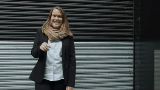

In [49]:
fg = FrameGenerator(train_files_path, train_classes, 10, training = True)

frames, label = next(fg())

print(f"Shape: {frames}")
print(f"Label: {label}")

to_gif(frames)

In [50]:
import tensorflow as tf
from tensorflow import keras
import keras.layers as layers

output_signature = (tf.TensorSpec(shape = (None, None, None, 3), dtype = tf.float16),
                    tf.TensorSpec(shape = (), dtype = tf.int16))

train_ds = tf.data.Dataset.from_generator(FrameGenerator(train_files_path, train_classes, 10, training = True),
                                          output_signature = output_signature)

test_ds = tf.data.Dataset.from_generator(FrameGenerator(test_files_path, test_classes, 10),
                                          output_signature = output_signature)

In [51]:
for frames, labels in train_ds.take(10):
    print(labels)

2023-05-04 13:02:24.335859: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


tf.Tensor(1, shape=(), dtype=int16)
tf.Tensor(0, shape=(), dtype=int16)
tf.Tensor(0, shape=(), dtype=int16)
tf.Tensor(0, shape=(), dtype=int16)
tf.Tensor(1, shape=(), dtype=int16)
tf.Tensor(1, shape=(), dtype=int16)
tf.Tensor(0, shape=(), dtype=int16)
tf.Tensor(0, shape=(), dtype=int16)
tf.Tensor(0, shape=(), dtype=int16)
tf.Tensor(1, shape=(), dtype=int16)


In [52]:
train_classes

['manipulated',
 'manipulated',
 'manipulated',
 'manipulated',
 'manipulated',
 'original',
 'original',
 'manipulated',
 'original',
 'manipulated',
 'original',
 'original',
 'manipulated',
 'manipulated',
 'original',
 'original',
 'manipulated',
 'original',
 'manipulated',
 'original',
 'manipulated',
 'original',
 'original',
 'manipulated',
 'manipulated',
 'original',
 'manipulated',
 'manipulated',
 'original',
 'manipulated',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'original',
 'manipulated',
 'manipulated',
 'original',
 'manipulated',
 'manipulated',
 'original',
 'original',
 'manipulated',
 'original',
 'manipulated',
 'manipulated',
 'manipulated',
 'original',
 'original',
 'manipulated',
 'original',
 'manipulated',
 'manipulated',
 'manipulated',
 'manipulated',
 'original',
 'manipulated',
 'manipulated',
 'original',
 'manipulated',
 'manipulated',
 'manipulated',
 'original',
 'original',
 'manipulated',
 'manipulated',
 'ori

In [53]:
train_ds

<FlatMapDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.float16, name=None), TensorSpec(shape=(), dtype=tf.int16, name=None))>

In [54]:
# Batching data (shuffling was temporarily removed due to being very time consuming)

train_ds = train_ds.batch(2).prefetch(1)
test_ds = test_ds.batch(2).prefetch(1)

In [55]:
# Checking data shape, whether frames are appropriately vectorized

train_frames, train_labels = next(iter(train_ds))
print(f'Shape of training set of frames: {train_frames.shape}')
print(f'Shape of training labels: {train_labels.shape}')

train_frames


Shape of training set of frames: (2, 10, 90, 160, 3)
Shape of training labels: (2,)


<tf.Tensor: shape=(2, 10, 90, 160, 3), dtype=float16, numpy=
array([[[[[0.7646, 0.784 , 0.8115],
          [0.7646, 0.784 , 0.8115],
          [0.7646, 0.784 , 0.8115],
          ...,
          [0.6763, 0.6   , 0.4412],
          [0.7075, 0.629 , 0.4836],
          [0.751 , 0.684 , 0.547 ]],

         [[0.7646, 0.784 , 0.8115],
          [0.7646, 0.784 , 0.8115],
          [0.7646, 0.784 , 0.8115],
          ...,
          [0.6763, 0.6   , 0.4412],
          [0.7036, 0.625 , 0.4795],
          [0.7505, 0.6836, 0.5464]],

         [[0.7646, 0.784 , 0.8115],
          [0.7646, 0.784 , 0.8115],
          [0.7646, 0.784 , 0.8115],
          ...,
          [0.678 , 0.602 , 0.445 ],
          [0.693 , 0.616 , 0.4673],
          [0.741 , 0.6704, 0.533 ]],

         ...,

         [[0.6333, 0.6255, 0.5195],
          [0.6333, 0.6255, 0.5195],
          [0.6323, 0.6255, 0.5176],
          ...,
          [0.792 , 0.8276, 0.8433],
          [0.792 , 0.8276, 0.8433],
          [0.792 , 0.8276, 0.8

In [56]:
test_frames, test_labels = next(iter(test_ds))
print(f'Shape of testing set of frames: {test_frames.shape}')
print(f'Shape of testing labels: {test_labels.shape}')

Shape of testing set of frames: (2, 10, 90, 160, 3)
Shape of testing labels: (2,)


In [57]:
# Shape of tensor, for feeding into model

image_shape = train_frames.shape

In [58]:
# Custom function for extracting video frames. Old implementation, commented out and preserved.

# def extract_video_frames(path):
#     for i in range(10):
#         sample_videos = []
#         print("Extracting frame from video", path[i], "-", i + 1, "of", len(path))
#         sample_videos.append(frames_from_video_file(path[i], n_frames = 5))    

#     return sample_videos
    

In [59]:
# Checking for GPU compatibility

from tensorflow.python.client import device_lib
def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]
print(get_available_devices())

import tensorflow as tf
print(tf.__version__)
print(tf.config.list_physical_devices())

['/device:CPU:0', '/device:GPU:0']
2.9.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [60]:
image_shape

TensorShape([2, 10, 90, 160, 3])

## Modeling

### CNN

In [61]:
batch_size = 64

cnn_vid = keras.Sequential([
    layers.Input(shape = image_shape[1:]),
    layers.Rescaling(1./255),
    layers.Conv3D(64, (3, 3, 3), activation='relu', input_shape=image_shape[1:]),
    layers.BatchNormalization(),
    layers.MaxPooling3D((2, 2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [62]:
cnn_vid.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [63]:
cnn_vid.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 10, 90, 160, 3)    0         
                                                                 
 conv3d (Conv3D)             (None, 8, 88, 158, 64)    5248      
                                                                 
 batch_normalization (BatchN  (None, 8, 88, 158, 64)   256       
 ormalization)                                                   
                                                                 
 max_pooling3d (MaxPooling3D  (None, 4, 44, 79, 64)    0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 889856)            0         
                                                                 
 dense (Dense)               (None, 512)               4

In [122]:
with tf.device('/GPU:0'):
    history = cnn_vid.fit(train_ds, 
          epochs = 10,
          validation_data = test_ds,
          steps_per_epoch = len(train) // 32)


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/batch_normalization/FusedBatchNormV3' defined at (most recent call last):
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/sv/jgqz9sd139sc35ybgkh4cw380000gn/T/ipykernel_73380/2950592986.py", line 2, in <module>
      history = cnn_vid.fit(train_ds,
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/layers/normalization/batch_normalization.py", line 750, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/layers/normalization/batch_normalization.py", line 594, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/control_flow_util.py", line 105, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/layers/normalization/batch_normalization.py", line 571, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential/batch_normalization/FusedBatchNormV3'
Detected at node 'sequential/batch_normalization/FusedBatchNormV3' defined at (most recent call last):
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/asyncio/base_events.py", line 1906, in _run_once
      handle._run()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/sv/jgqz9sd139sc35ybgkh4cw380000gn/T/ipykernel_73380/2950592986.py", line 2, in <module>
      history = cnn_vid.fit(train_ds,
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/layers/normalization/batch_normalization.py", line 750, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/layers/normalization/batch_normalization.py", line 594, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/utils/control_flow_util.py", line 105, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "/Users/jeffreywilliams/anaconda3/lib/python3.10/site-packages/keras/layers/normalization/batch_normalization.py", line 571, in _fused_batch_norm_training
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential/batch_normalization/FusedBatchNormV3'
2 root error(s) found.
  (0) INVALID_ARGUMENT:  input must be 4-dimensional[2,8,88,158,64]
	 [[{{node sequential/batch_normalization/FusedBatchNormV3}}]]
	 [[gradient_tape/sequential/flatten/Reshape/_32]]
  (1) INVALID_ARGUMENT:  input must be 4-dimensional[2,8,88,158,64]
	 [[{{node sequential/batch_normalization/FusedBatchNormV3}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_13297]

In [ ]:
# Plot accuracy/loss for training/validation

epochs = range(2, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss[1:50], "bo", label="Training loss")
plt.plot(epochs, val_loss[1:50], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

# Image data

In [65]:
import numpy as np
import random
from tensorflow.keras.utils import load_img, img_to_array

img_size = (216, 384)
num_imgs = len(original_still) + len(manip_still)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

def path_to_target(path):
    img = img_to_array(
        load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

images_array = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + (1,), dtype="uint8")

print(images_array.shape)

i = 0
for dirname, _, filenames in os.walk(orig_still_path):
    for filename in filenames:
        images_array[i] = path_to_input_image(orig_still_path + filename)
        targets[i] = 0
        i += 1

for dirname, _, filenames in os.walk(manip_still_path):
    for filename in filenames:
        images_array[i] = path_to_input_image(manip_still_path + filename)
        targets[i] = 1
        i += 1

(726, 216, 384, 3)


In [66]:
indices = np.random.permutation(len(images_array))

shuffled_image_array = images_array[indices]
shuffled_targets = targets[indices]

shuffled_image_array

array([[[[175., 160., 105.],
         [175., 158., 104.],
         [174., 157., 101.],
         ...,
         [183., 167., 108.],
         [183., 167., 108.],
         [187., 171., 111.]],

        [[165., 151.,  90.],
         [170., 154.,  95.],
         [171., 155.,  96.],
         ...,
         [174., 159., 100.],
         [169., 154.,  95.],
         [174., 159., 102.]],

        [[167., 152.,  93.],
         [171., 155.,  96.],
         [169., 153.,  94.],
         ...,
         [190., 174., 122.],
         [186., 170., 118.],
         [186., 170., 118.]],

        ...,

        [[ 34.,  34.,  24.],
         [ 37.,  37.,  29.],
         [ 41.,  41.,  33.],
         ...,
         [158., 148.,  79.],
         [156., 145.,  83.],
         [159., 146.,  93.]],

        [[ 34.,  34.,  26.],
         [ 39.,  36.,  31.],
         [ 37.,  37.,  29.],
         ...,
         [173., 162.,  98.],
         [177., 168., 111.],
         [178., 173., 118.]],

        [[ 34.,  34.,  26.],
       

In [67]:
targets.shape

(726, 1)

In [68]:
num_val_samples = 200 # Was 1000 

train_input_imgs = shuffled_image_array[:-num_val_samples]
train_targets = shuffled_targets[:-num_val_samples]
val_input_imgs = shuffled_image_array[-num_val_samples:]
val_targets = shuffled_targets[-num_val_samples:]

In [69]:
img_size + (3,)

(216, 384, 3)

In [70]:
xception = keras.applications.xception.Xception(
    weights="imagenet",
    include_top=False)

In [71]:
for layer in xception.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.SeparableConv2D)):
        print(layer.name)

block1_conv1
block1_conv2
block2_sepconv1
block2_sepconv2
conv2d
block3_sepconv1
block3_sepconv2
conv2d_1
block4_sepconv1
block4_sepconv2
conv2d_2
block5_sepconv1
block5_sepconv2
block5_sepconv3
block6_sepconv1
block6_sepconv2
block6_sepconv3
block7_sepconv1
block7_sepconv2
block7_sepconv3
block8_sepconv1
block8_sepconv2
block8_sepconv3
block9_sepconv1
block9_sepconv2
block9_sepconv3
block10_sepconv1
block10_sepconv2
block10_sepconv3
block11_sepconv1
block11_sepconv2
block11_sepconv3
block12_sepconv1
block12_sepconv2
block12_sepconv3
block13_sepconv1
block13_sepconv2
conv2d_3
block14_sepconv1
block14_sepconv2


In [72]:
layer_name = "block3_sepconv1"
layer = xception.get_layer(name=layer_name)
feature_extractor = keras.Model(inputs=xception.input, outputs=layer.output)

In [112]:
img_tensor = images_array[1]

In [113]:
img_tensor.shape

(216, 384, 3)

In [101]:
img_tensor = images_array[1]

activation = feature_extractor(
    keras.applications.xception.preprocess_input(img_tensor)
)

ValueError: Exception encountered when calling layer "model" (type Functional).

Input 0 of layer "block1_conv1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (216, 384, 3)

Call arguments received by layer "model" (type Functional):
  • inputs=tf.Tensor(shape=(216, 384, 3), dtype=float32)
  • training=False
  • mask=None

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=img_size + (3,)),
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='softmax')
    
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 216, 384, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 214, 382, 32)      896       
                                                                 
 batch_normalization_5 (Batc  (None, 214, 382, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 107, 191, 32)     0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 105, 189, 64)      18496     
                                                                 
 batch_normalization_6 (Batc  (None, 105, 189, 64)    

In [75]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics = ['accuracy'])


with tf.device('/GPU:0'):
    history = model.fit(train_input_imgs, train_targets,
                    epochs=30, 
                    batch_size=32, 
                    validation_data=(val_input_imgs, val_targets))

Epoch 1/30
17/17 [==============================] - 9s 385ms/step - loss: 37.6872 - accuracy: 0.4905 - val_loss: 0.7300 - val_accuracy: 0.5250
Epoch 2/30
17/17 [==============================] - 5s 290ms/step - loss: 0.7338 - accuracy: 0.4905 - val_loss: 2.5788 - val_accuracy: 0.5250
Epoch 3/30
17/17 [==============================] - 5s 276ms/step - loss: 2.8851 - accuracy: 0.4905 - val_loss: 0.6373 - val_accuracy: 0.5250
Epoch 4/30
17/17 [==============================] - 5s 274ms/step - loss: 0.1300 - accuracy: 0.4905 - val_loss: 0.9951 - val_accuracy: 0.5250
Epoch 5/30
17/17 [==============================] - 4s 265ms/step - loss: 7.6819 - accuracy: 0.4905 - val_loss: 0.9365 - val_accuracy: 0.5250
Epoch 6/30
17/17 [==============================] - 5s 282ms/step - loss: 0.6177 - accuracy: 0.4905 - val_loss: 1.0353 - val_accuracy: 0.5250
Epoch 7/30
17/17 [==============================] - 5s 278ms/step - loss: 0.0836 - accuracy: 0.4905 - val_loss: 1.6818 - val_accuracy: 0.5250
Epoch

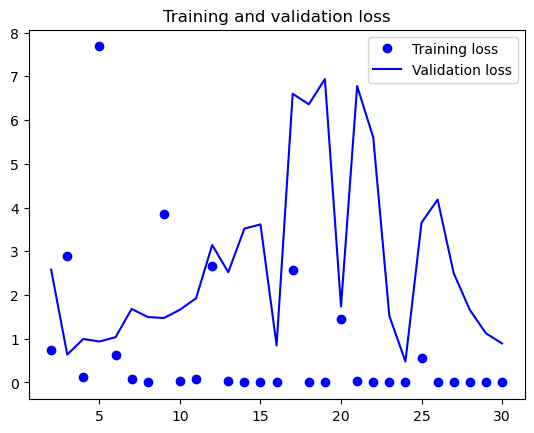

In [76]:
# Plot accuracy/loss for training/validation

epochs = range(2, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss[1:50], "bo", label="Training loss")
plt.plot(epochs, val_loss[1:50], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

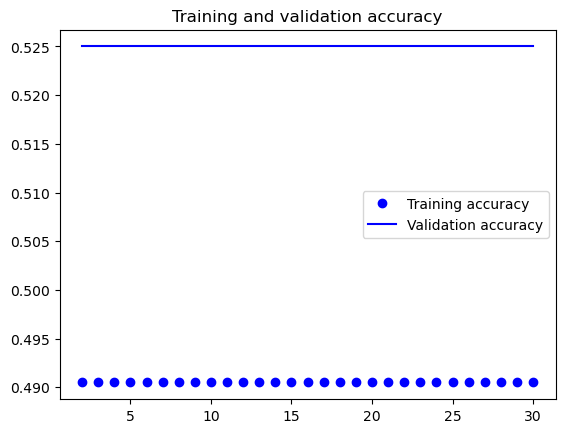

In [77]:
# Plot accuracy/loss for training/validation

epochs = range(2, len(history.history["accuracy"]) + 1)
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.figure()
plt.plot(epochs, acc[1:50], "bo", label="Training accuracy")
plt.plot(epochs, val_acc[1:50], "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()